## Data Visulization 📊

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Reading the DataFile

In [2]:
dataset = pd.read_csv("Complete_Clean_Dataset.csv")


In [3]:
dataset.head()

,Unnamed: 0.1,Unnamed: 0,AD_Name,AD_id,Engine Capacity,Category,Body Condition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Assembly,Price,Ad_link,ad_Date,Car_Name,Brand_Name
0,0,0,Changan Alsvin 1.5L DCT Lumiere 2022,8667314,1500,Sedan,Good,2022,57000,Petrol,Automatic,Steller White,Islamabad,Local,38.5,https://www.pakwheels.com/used-cars/changan-al...,2024-02-23,Alsvin,Changan
1,1,1,Changan Alsvin 1.5L DCT Lumiere 2022,8671937,1500,Sedan,Excellent,2022,23000,Petrol,Automatic,Steller White,Punjab,Local,36.95,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
2,2,2,Changan Alsvin 1.5L DCT Lumiere 2022,8671719,1500,Sedan,Good,2022,11900,Petrol,Automatic,Galaxy Black,Islamabad,Imported,36.9,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
3,3,3,Changan Alsvin 1.5L DCT Lumiere 2021,8670594,1500,Sedan,Fair,2021,40000,Petrol,Automatic,Silver,Islamabad,Local,37.5,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
4,4,4,Changan Alsvin 1.5L DCT Lumiere 2022,8605664,1500,Sedan,Good,2022,16000,Petrol,Automatic,Black,Karachi,Local,37.5,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan


Dropping unwanted Columns

In [4]:
dataset.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace= True)


In [5]:
dataset.head()

,AD_Name,AD_id,Engine Capacity,Category,Body Condition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Assembly,Price,Ad_link,ad_Date,Car_Name,Brand_Name
0,Changan Alsvin 1.5L DCT Lumiere 2022,8667314,1500,Sedan,Good,2022,57000,Petrol,Automatic,Steller White,Islamabad,Local,38.5,https://www.pakwheels.com/used-cars/changan-al...,2024-02-23,Alsvin,Changan
1,Changan Alsvin 1.5L DCT Lumiere 2022,8671937,1500,Sedan,Excellent,2022,23000,Petrol,Automatic,Steller White,Punjab,Local,36.95,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
2,Changan Alsvin 1.5L DCT Lumiere 2022,8671719,1500,Sedan,Good,2022,11900,Petrol,Automatic,Galaxy Black,Islamabad,Imported,36.9,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
3,Changan Alsvin 1.5L DCT Lumiere 2021,8670594,1500,Sedan,Fair,2021,40000,Petrol,Automatic,Silver,Islamabad,Local,37.5,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
4,Changan Alsvin 1.5L DCT Lumiere 2022,8605664,1500,Sedan,Good,2022,16000,Petrol,Automatic,Black,Karachi,Local,37.5,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan


### Data Pre-Processing

In [6]:
dataset.isnull().sum()

AD_Name            0
AD_id              0
Engine Capacity    0
Category           0
Body Condition     0
model Year         0
Milage             0
Fuel Type          0
Transmission       0
Color              2
City Registered    0
Assembly           0
Price              0
Ad_link            0
ad_Date            0
Car_Name           0
Brand_Name         0
dtype: int64

### making an copy of the dataset

In [7]:
copy_dataset = dataset

In [8]:
indices_to_drop = copy_dataset[copy_dataset['Price'].str.contains('Call for price')].index

indices_to_drop


Index([ 1007,  1249,  1252,  2296,  2299,  2483,  2601,  2962,  3469,  3497,
       ...
       15408, 15554, 15559, 15574, 15589, 15604, 16026, 16027, 16050, 16053],
      dtype='int64', length=220)

In [9]:
copy_dataset.iloc[1007]

AD_Name                                     Suzuki Alto VXL AGS 2020
AD_id                                                        8634575
Engine Capacity                                                  650
Category                                                   Hatchback
Body Condition                                                  Fair
model Year                                                      2020
Milage                                                         43000
Fuel Type                                                     Petrol
Transmission                                               Automatic
Color                                                          White
City Registered                                              Karachi
Assembly                                                       Local
Price                                                 Call for price
Ad_link            https://www.pakwheels.com/used-cars/suzuki-alt...
ad_Date                           

#### Dropping the rows where car price is 'Call for price'

In [10]:
copy_dataset.drop(indices_to_drop, inplace=True)

In [11]:
# checking again
copy_dataset[copy_dataset['Price'].str.contains('Call for price')].index


Index([], dtype='int64')

As price , engine capacity , model year , milage has to be in int of float so converting them 

In [12]:
copy_dataset.dtypes

AD_Name            object
AD_id               int64
Engine Capacity     int64
Category           object
Body Condition     object
model Year          int64
Milage              int64
Fuel Type          object
Transmission       object
Color              object
City Registered    object
Assembly           object
Price              object
Ad_link            object
ad_Date            object
Car_Name           object
Brand_Name         object
dtype: object

In [13]:
# chaning price column from object type to float
copy_dataset['Price'] = copy_dataset['Price'].astype('float64')

In [14]:
# changing milage from object type to int64
copy_dataset['Milage'] = copy_dataset['Milage'].astype('int64')

In [15]:
copy_dataset.dtypes

AD_Name             object
AD_id                int64
Engine Capacity      int64
Category            object
Body Condition      object
model Year           int64
Milage               int64
Fuel Type           object
Transmission        object
Color               object
City Registered     object
Assembly            object
Price              float64
Ad_link             object
ad_Date             object
Car_Name            object
Brand_Name          object
dtype: object

In [16]:
copy_dataset['ad_Date']

0          2024-02-23
1          2024-05-04
2          2024-05-04
3          2024-05-04
4          2024-05-04
             ...     
22256    May 18, 2024
22257    May 18, 2024
22258    May 18, 2024
22259    May 18, 2024
22260    May 18, 2024
Name: ad_Date, Length: 22041, dtype: object

### converting the ad_date column into data format



In [17]:
# Convert dates in "Mar 08, 2024" format to "3/08/2024" format if not already formatted
converted_dates = []
for date_str in copy_dataset['ad_Date']:
    #print('original-->',date_str)
    try:
        converted_date = pd.to_datetime(date_str, errors='raise').strftime('%m/%d/%Y')  # Convert to desired format
        #print('converted-->',converted_date)
        converted_dates.append(converted_date)
    except ValueError:
        converted_dates.append(date_str)  # Keep the original date if conversion fails
print(converted_dates)
# Update the 'ad_Date' column with converted dates or original values
copy_dataset['ad_Date'] = converted_dates

# Print the DataFrame with converted dates
print(pd.Series(converted_dates).isnull().sum())

['02/23/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/05/2024', '05/05/2024', '05/05/2024', '05/05/2024', '05/05/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/04/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/01/2024', '05/01/2024', '05/01/2024', '05/01/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/03/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/02/2024', '05/0

In [18]:
copy_dataset

,AD_Name,AD_id,Engine Capacity,Category,Body Condition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Assembly,Price,Ad_link,ad_Date,Car_Name,Brand_Name
0,Changan Alsvin 1.5L DCT Lumiere 2022,8667314,1500,Sedan,Good,2022,57000,Petrol,Automatic,Steller White,Islamabad,Local,38.50,https://www.pakwheels.com/used-cars/changan-al...,02/23/2024,Alsvin,Changan
1,Changan Alsvin 1.5L DCT Lumiere 2022,8671937,1500,Sedan,Excellent,2022,23000,Petrol,Automatic,Steller White,Punjab,Local,36.95,https://www.pakwheels.com/used-cars/changan-al...,05/04/2024,Alsvin,Changan
2,Changan Alsvin 1.5L DCT Lumiere 2022,8671719,1500,Sedan,Good,2022,11900,Petrol,Automatic,Galaxy Black,Islamabad,Imported,36.90,https://www.pakwheels.com/used-cars/changan-al...,05/04/2024,Alsvin,Changan
3,Changan Alsvin 1.5L DCT Lumiere 2021,8670594,1500,Sedan,Fair,2021,40000,Petrol,Automatic,Silver,Islamabad,Local,37.50,https://www.pakwheels.com/used-cars/changan-al...,05/04/2024,Alsvin,Changan
4,Changan Alsvin 1.5L DCT Lumiere 2022,8605664,1500,Sedan,Good,2022,16000,Petrol,Automatic,Black,Karachi,Local,37.50,https://www.pakwheels.com/used-cars/changan-al...,05/04/2024,Alsvin,Changan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22256,Toyota Vitz F 1.0 2009,8726704,1000,Hatchback,Excellent,2009,125000,Petrol,Automatic,Metallic,Lahore,Imported,24.50,https://www.pakwheels.com/used-cars/toyota-vit...,05/18/2024,Vitz,Toyota
22257,Toyota Vitz U 1.3 2007,8726682,1300,Hatchback,Excellent,2007,125000,Petrol,Automatic,Beige,Sindh,Imported,17.95,https://www.pakwheels.com/used-cars/toyota-vit...,05/18/2024,Vitz,Toyota
22258,Toyota Vitz F 1.0 2007,8726670,1000,Hatchback,Good,2007,150000,Petrol,Automatic,White,Islamabad,Imported,20.50,https://www.pakwheels.com/used-cars/toyota-vit...,05/18/2024,Vitz,Toyota
22259,Toyota Vitz F Safety Edition III 2019,8598673,1000,Hatchback,Good,2019,64000,Petrol,Automatic,Black,Karachi,Imported,41.25,https://www.pakwheels.com/used-cars/toyota-vit...,05/18/2024,Vitz,Toyota


In [19]:
copy_dataset['ad_Date'] = pd.to_datetime(copy_dataset['ad_Date'])
copy_dataset['ad_Date']

0       2024-02-23
1       2024-05-04
2       2024-05-04
3       2024-05-04
4       2024-05-04
           ...    
22256   2024-05-18
22257   2024-05-18
22258   2024-05-18
22259   2024-05-18
22260   2024-05-18
Name: ad_Date, Length: 22041, dtype: datetime64[ns]

In [31]:
copy_dataset.dtypes

AD_Name                    object
AD_id                       int64
Engine Capacity             int64
Category                   object
Body Condition             object
model Year                  int64
Milage                      int64
Fuel Type                  object
Transmission               object
Color                      object
City Registered            object
Assembly                   object
Price                     float64
Ad_link                    object
ad_Date            datetime64[ns]
Car_Name                   object
Brand_Name                 object
dtype: object

### Now its time to plot the graphs to find the realtions

In [42]:
def histogram(column_name):
    plt.figure(figsize=(20,6))
    sns.histplot(data=copy_dataset[column_name],bins=20,kde=True,color='orange')
    plt.title(column_name+'distribution')
    plt.show()

In [41]:
def count_plot(column):
    plt.figure(figsize = (20,6))
    sns.countplot(data = copy_dataset , x= column,color='red')
    plt.title(f"Count Plot - {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

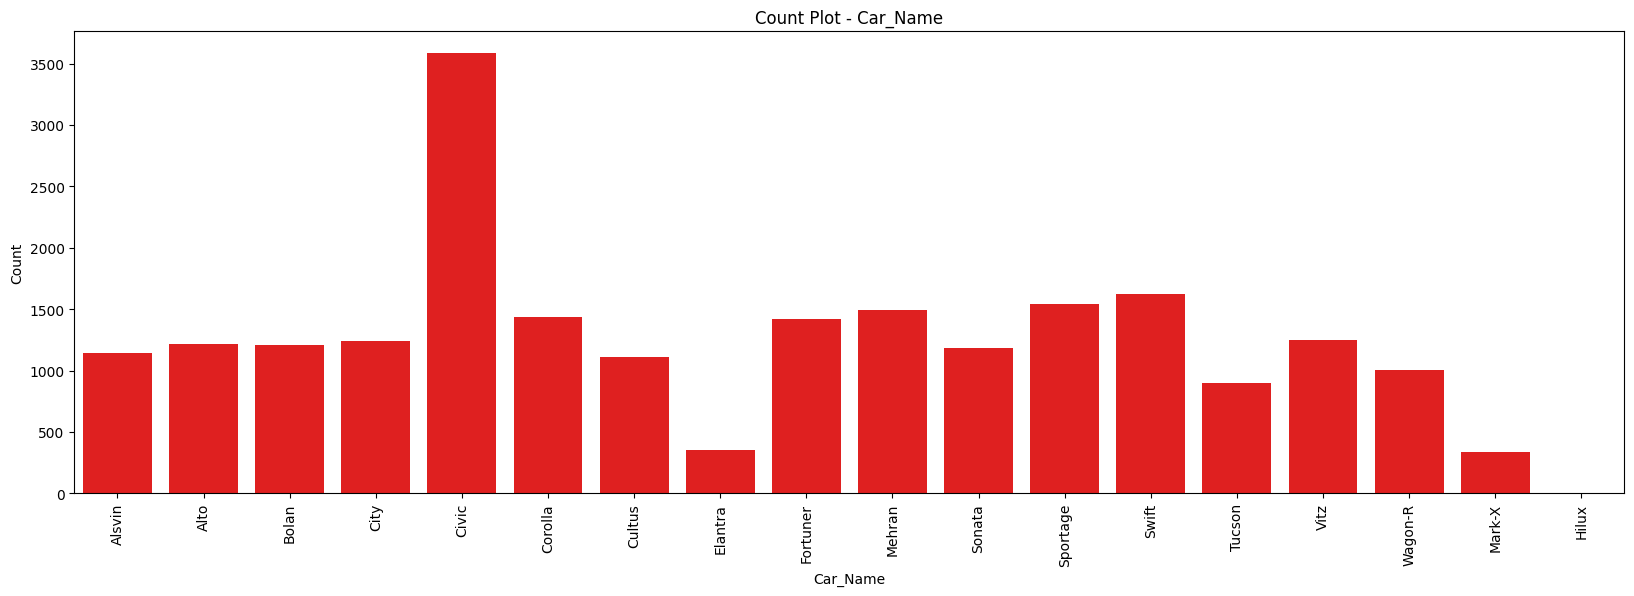

In [43]:
count_plot('Car_Name')

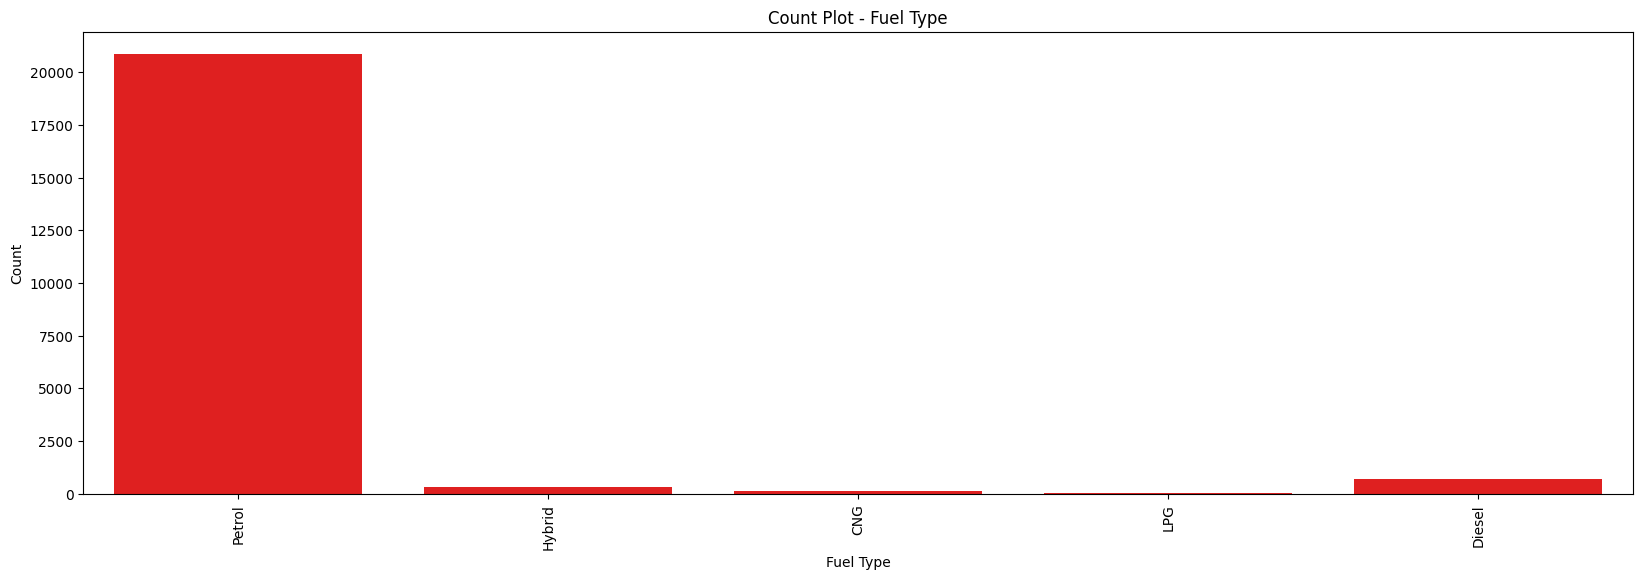

In [44]:
count_plot('Fuel Type')

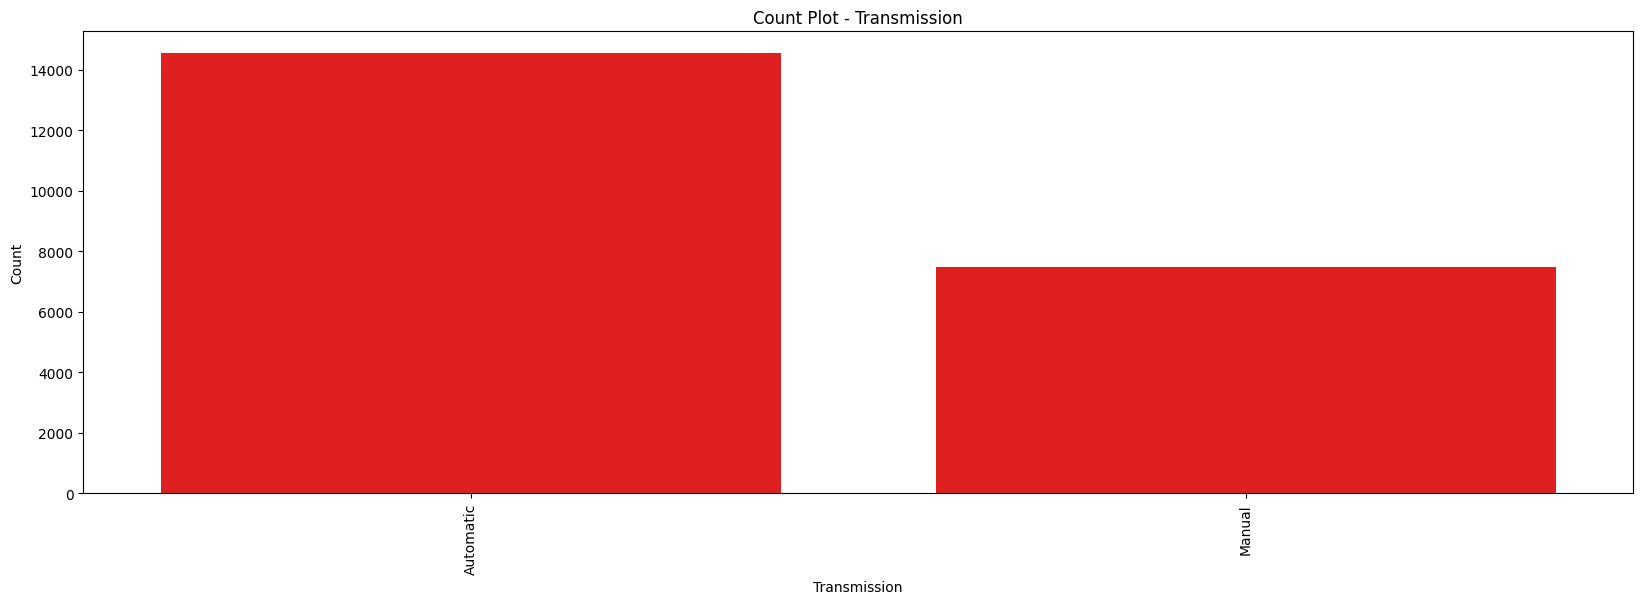

In [45]:
count_plot("Transmission")

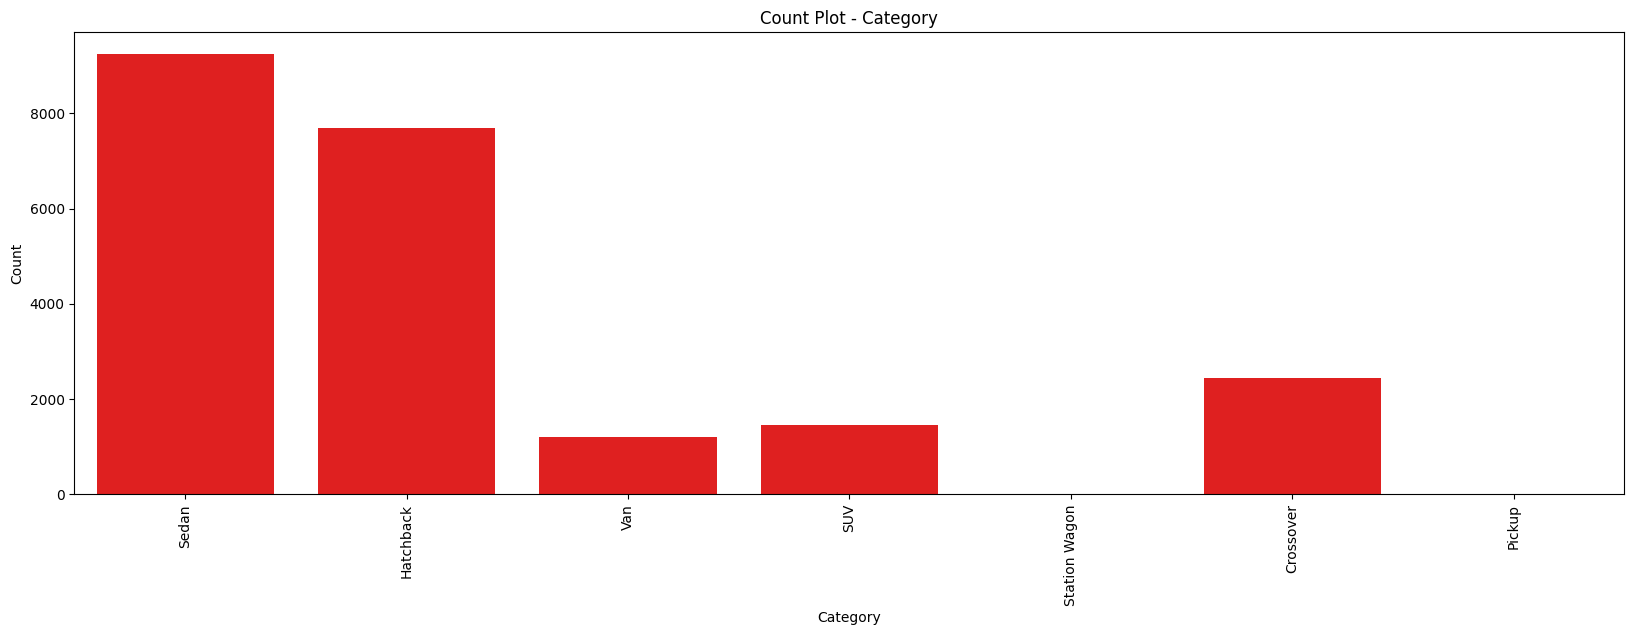

In [46]:
count_plot('Category')

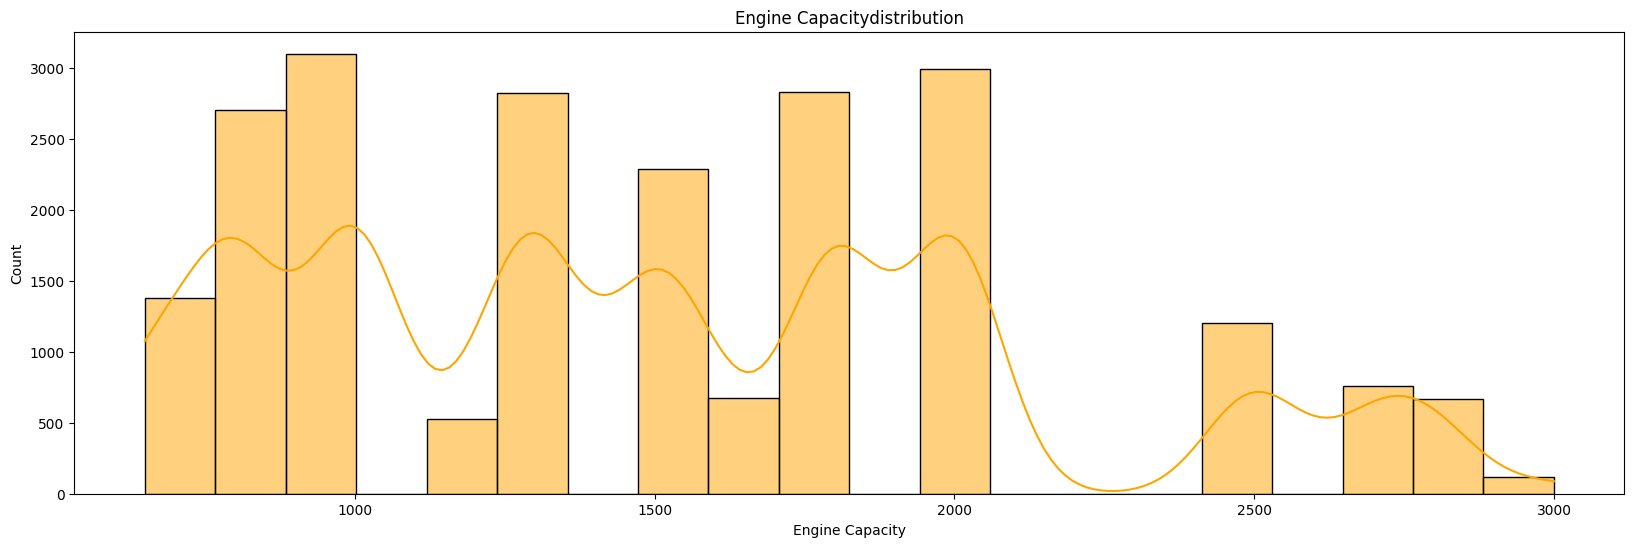

In [47]:
histogram('Engine Capacity')

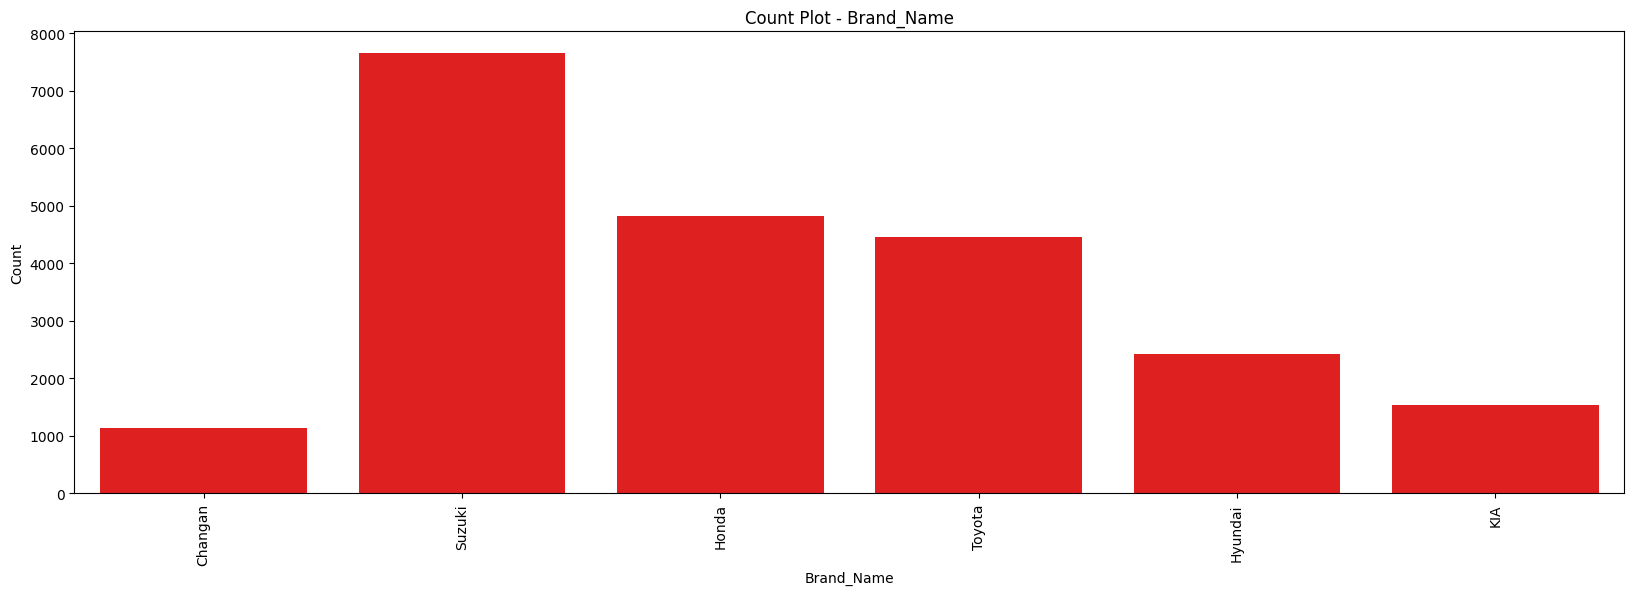

In [48]:
count_plot('Brand_Name')

### Visulizing the relation between different columns and price


In [51]:
# separating the categorical and numerical columns
categorical_columns = copy_dataset.select_dtypes(include=object).columns.to_list()
numerical_columns = copy_dataset.select_dtypes(exclude=object).columns.to_list()


In [50]:
numerical_columns

['AD_id', 'Engine Capacity', 'model Year', 'Milage', 'Price', 'ad_Date']

In [52]:
print("Categorical Columns -->",categorical_columns)
print("Numerical Columns -->",numerical_columns)


Categorical Columns --> ['AD_Name', 'Category', 'Body Condition', 'Fuel Type', 'Transmission', 'Color', 'City Registered', 'Assembly', 'Ad_link', 'Car_Name', 'Brand_Name']
Numerical Columns --> ['AD_id', 'Engine Capacity', 'model Year', 'Milage', 'Price', 'ad_Date']


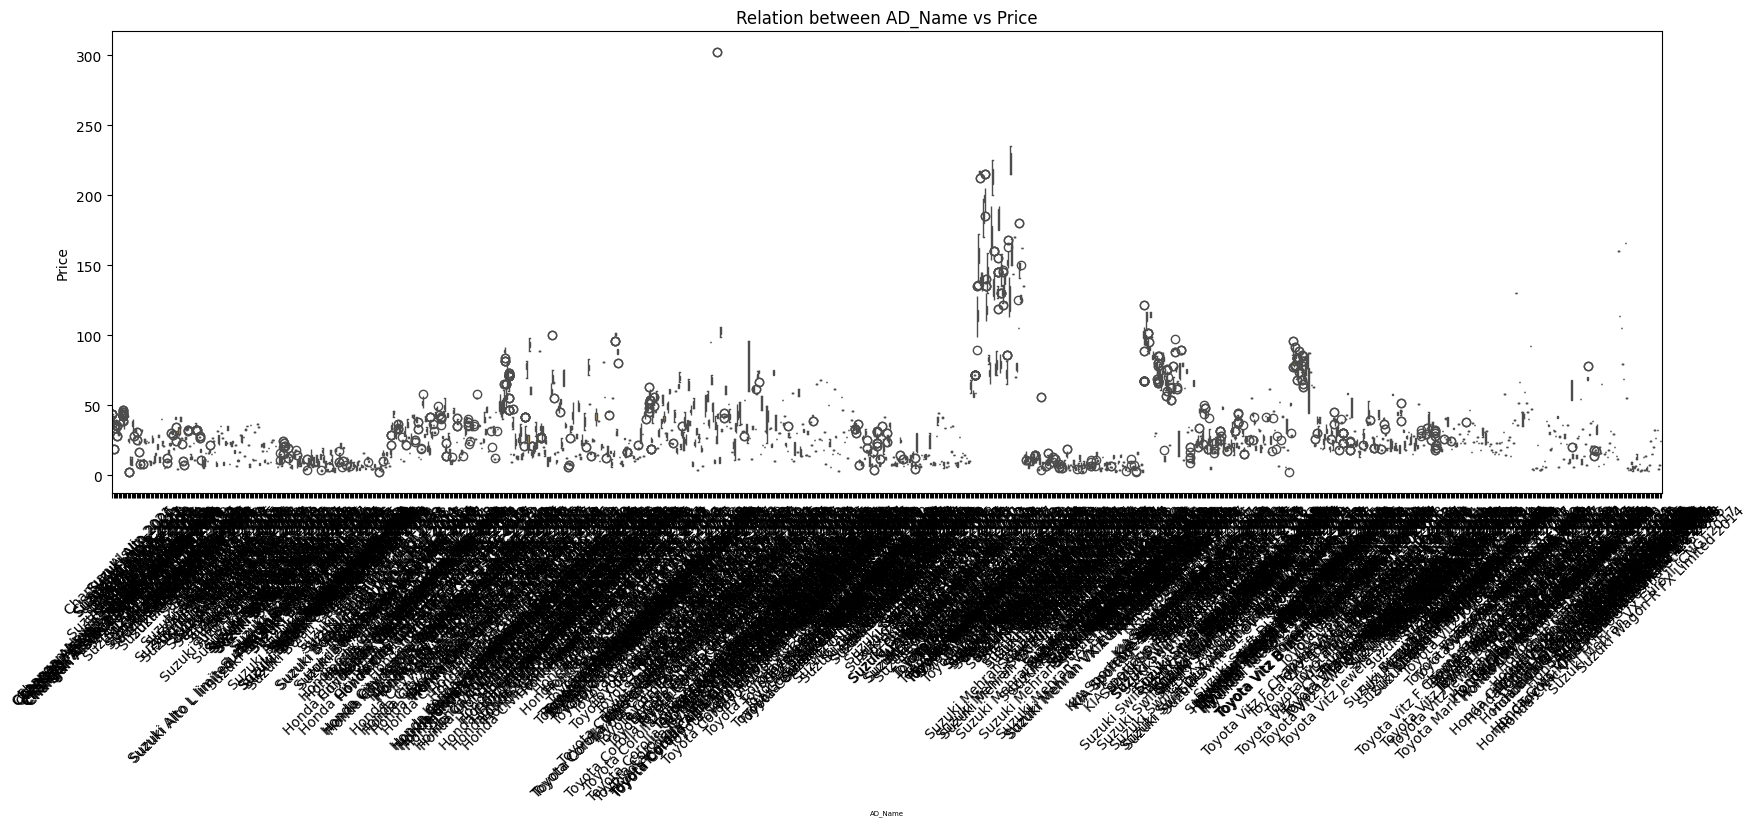

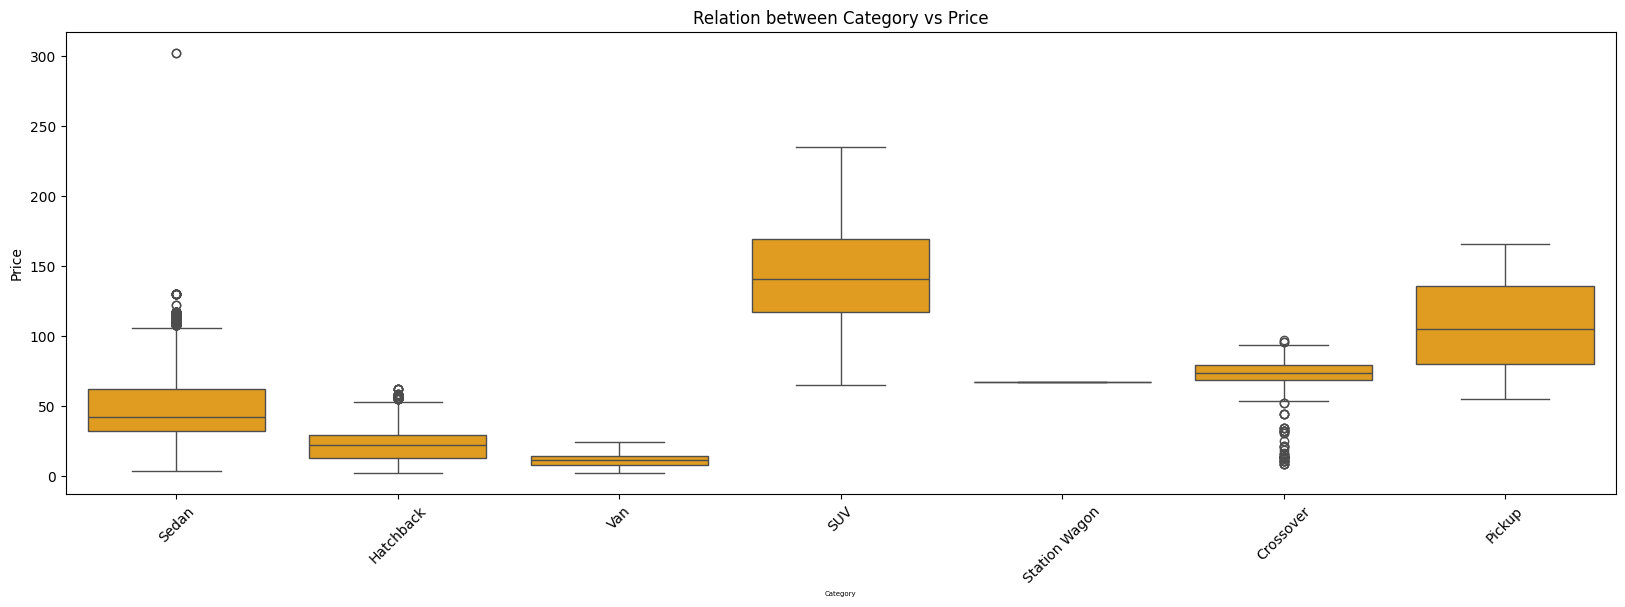

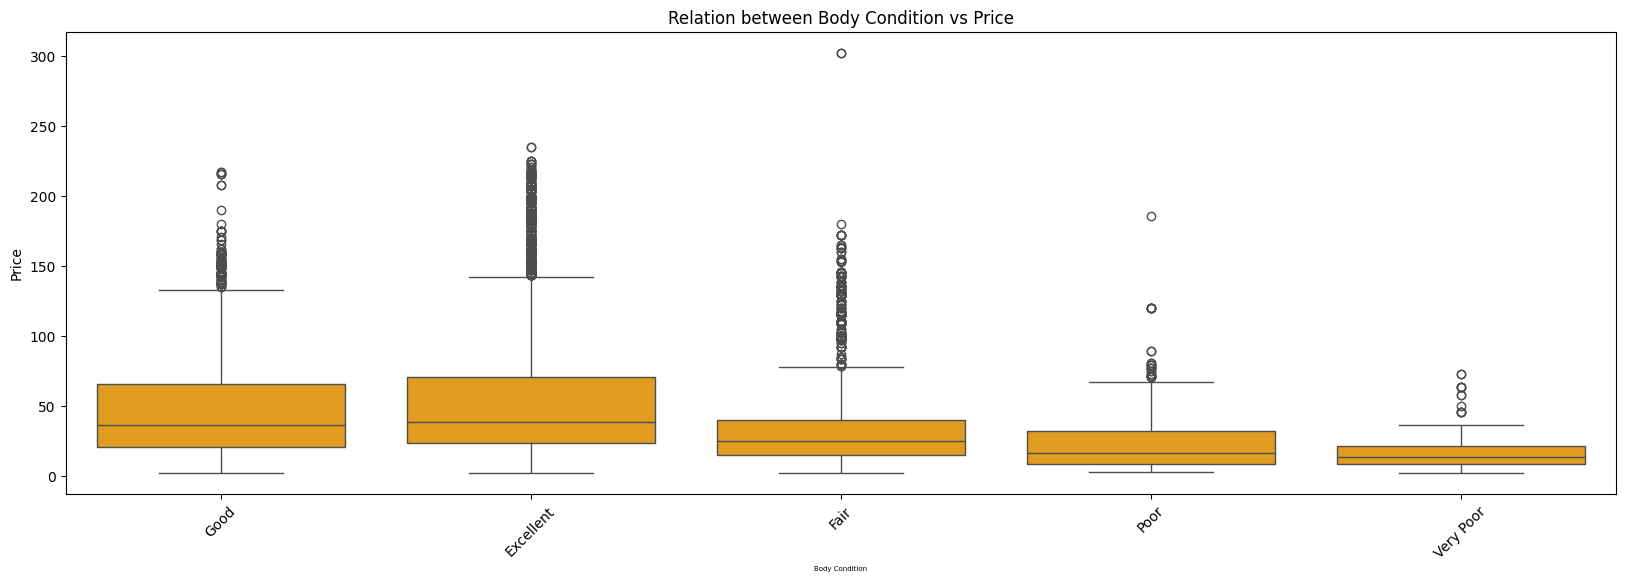

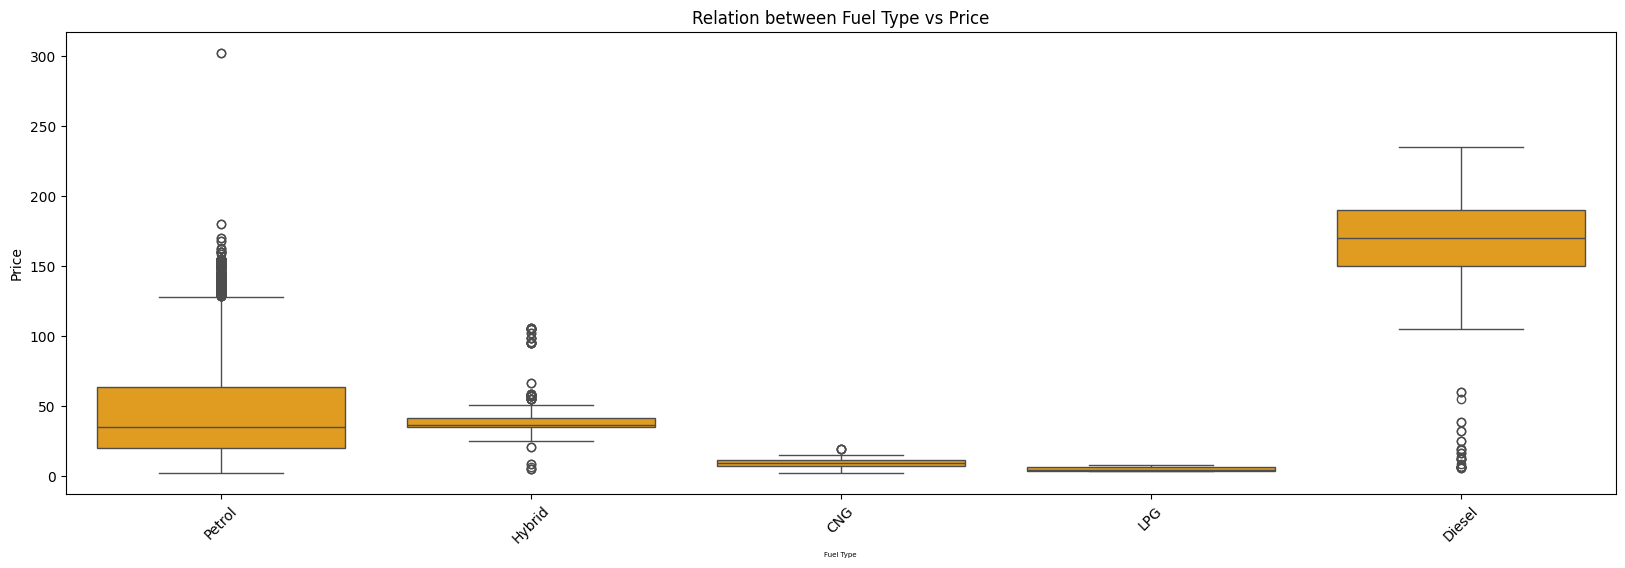

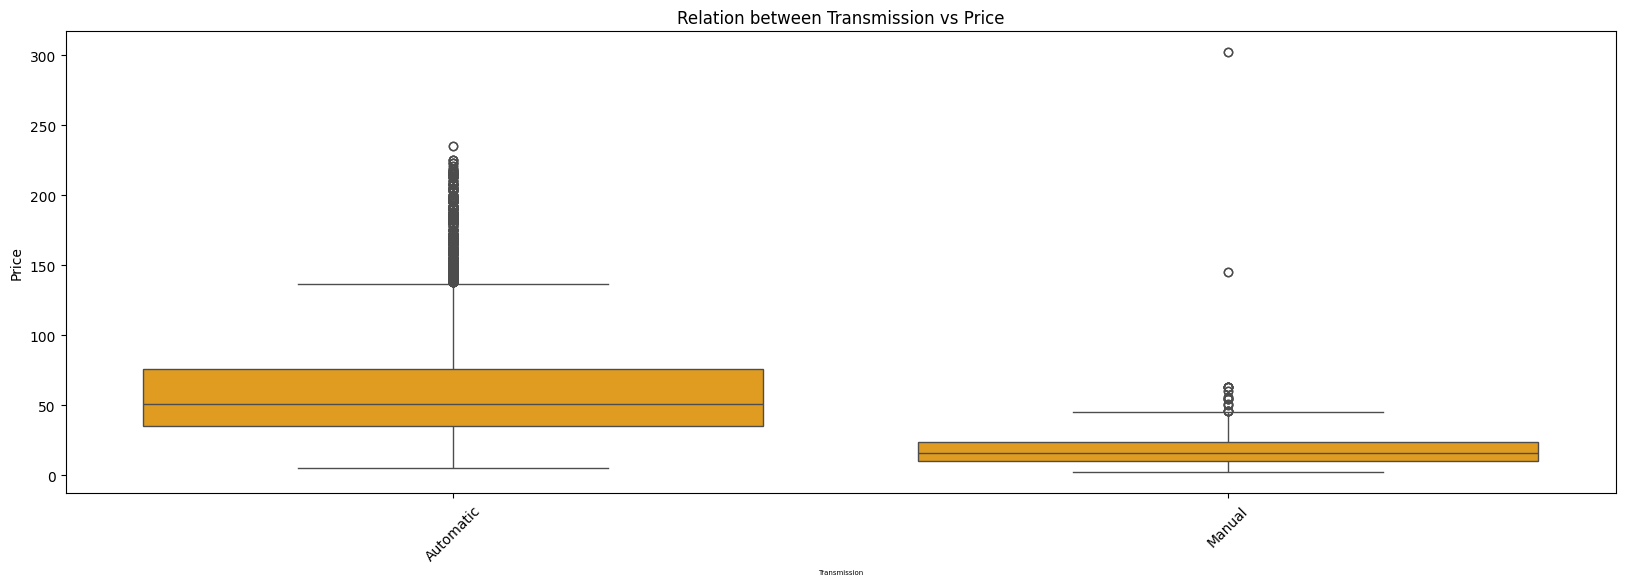

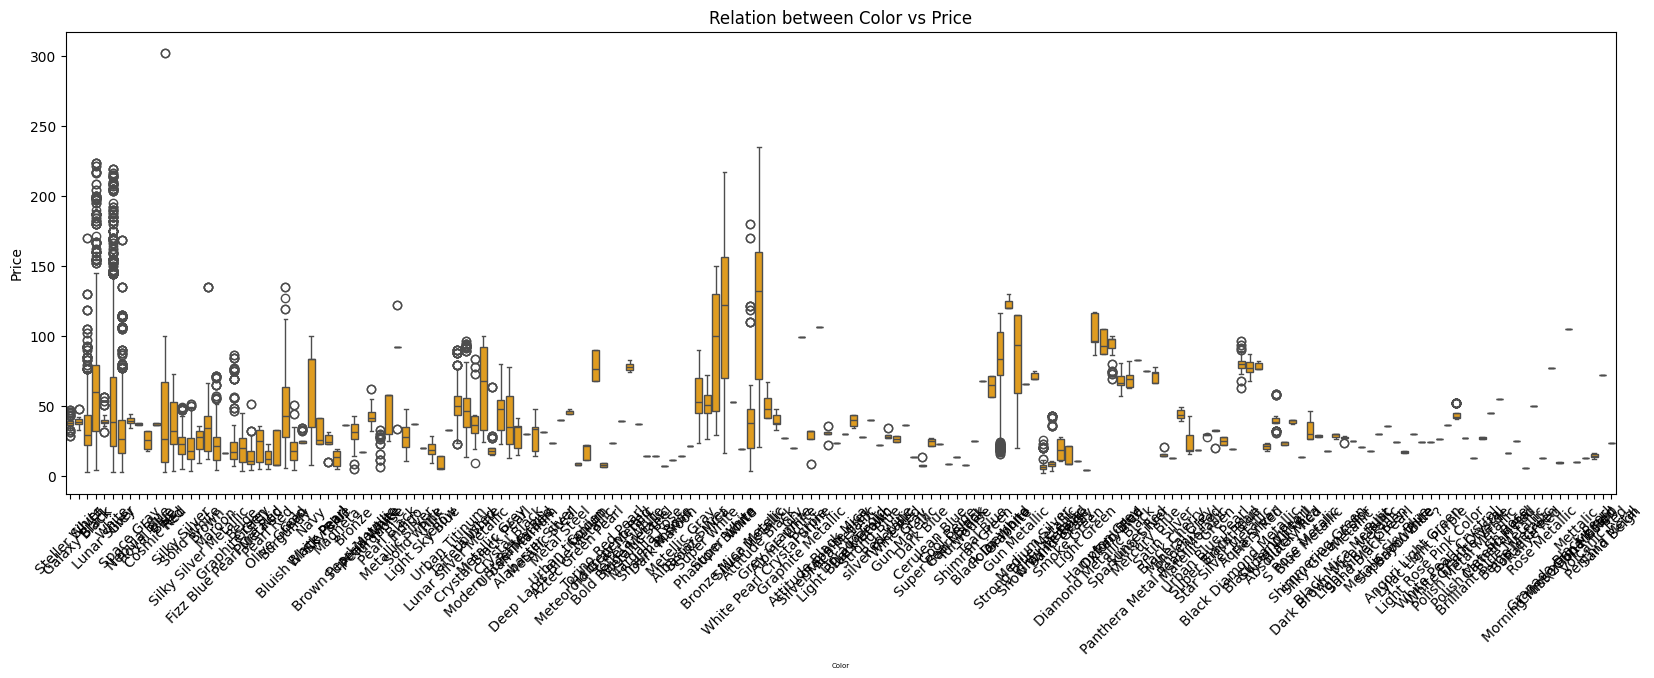

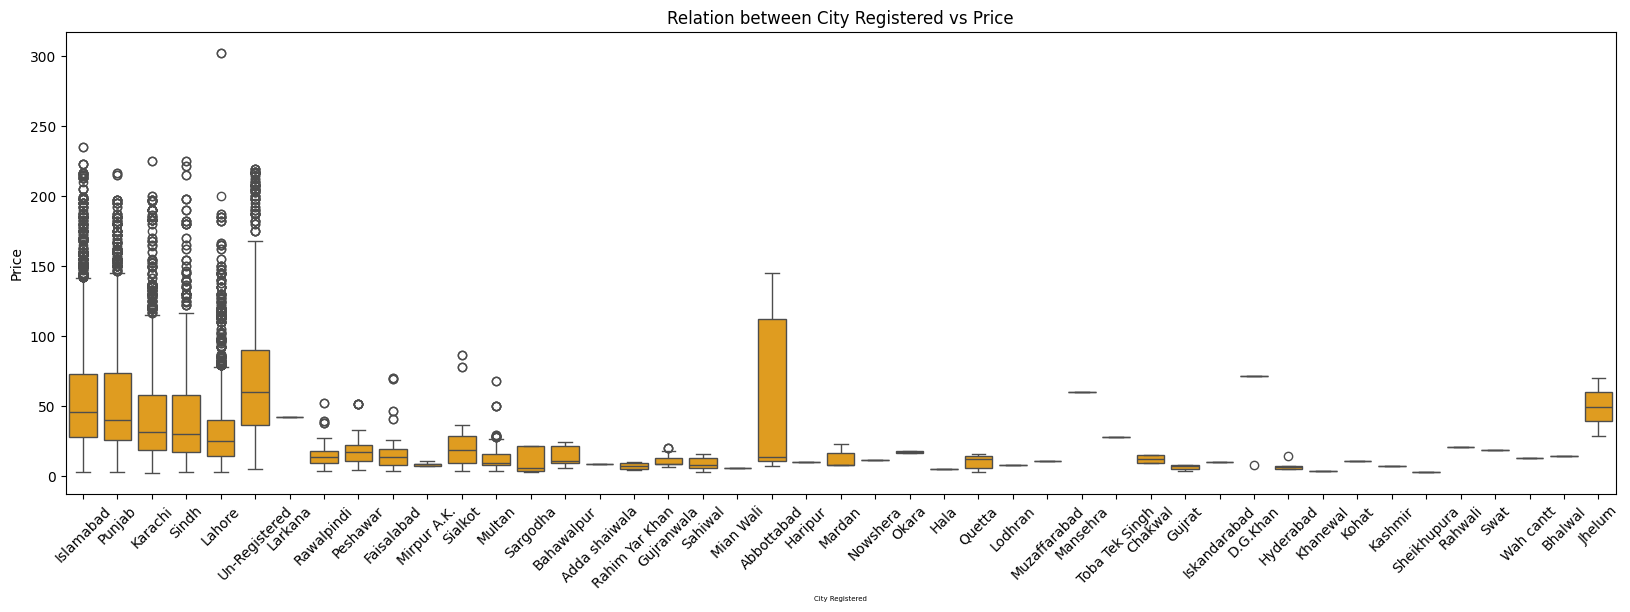

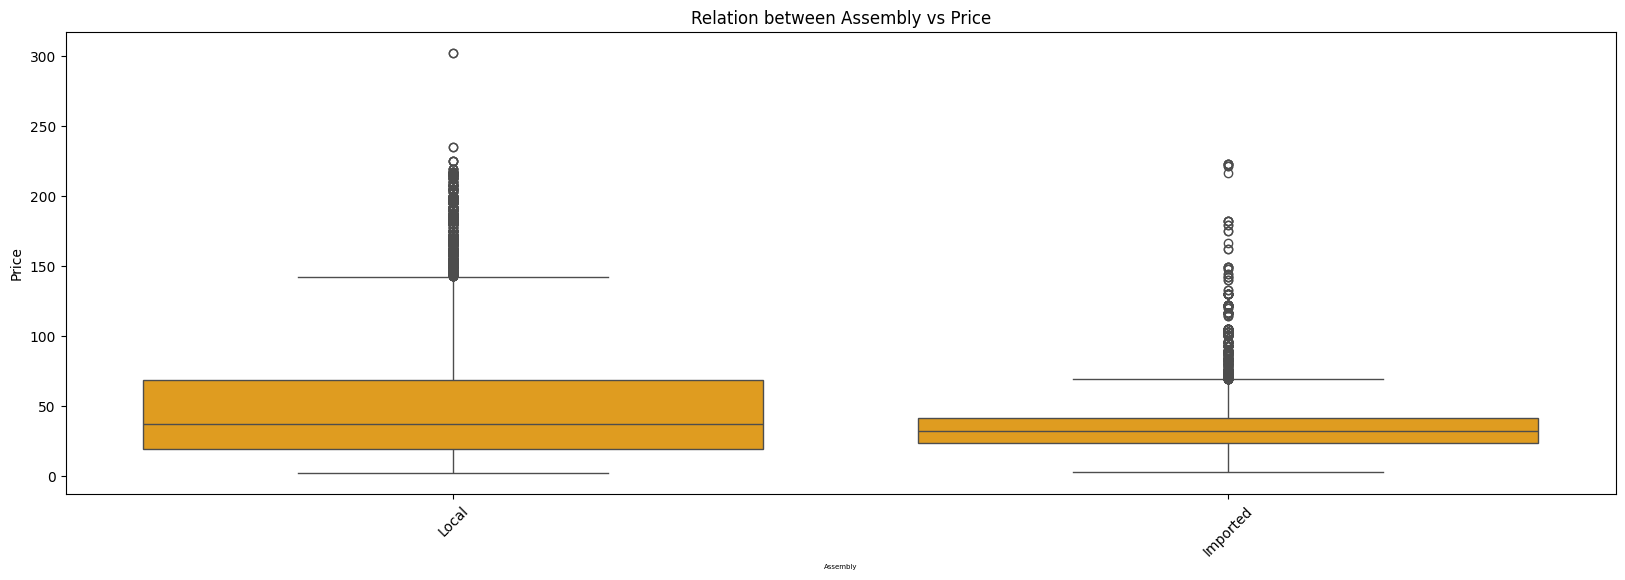

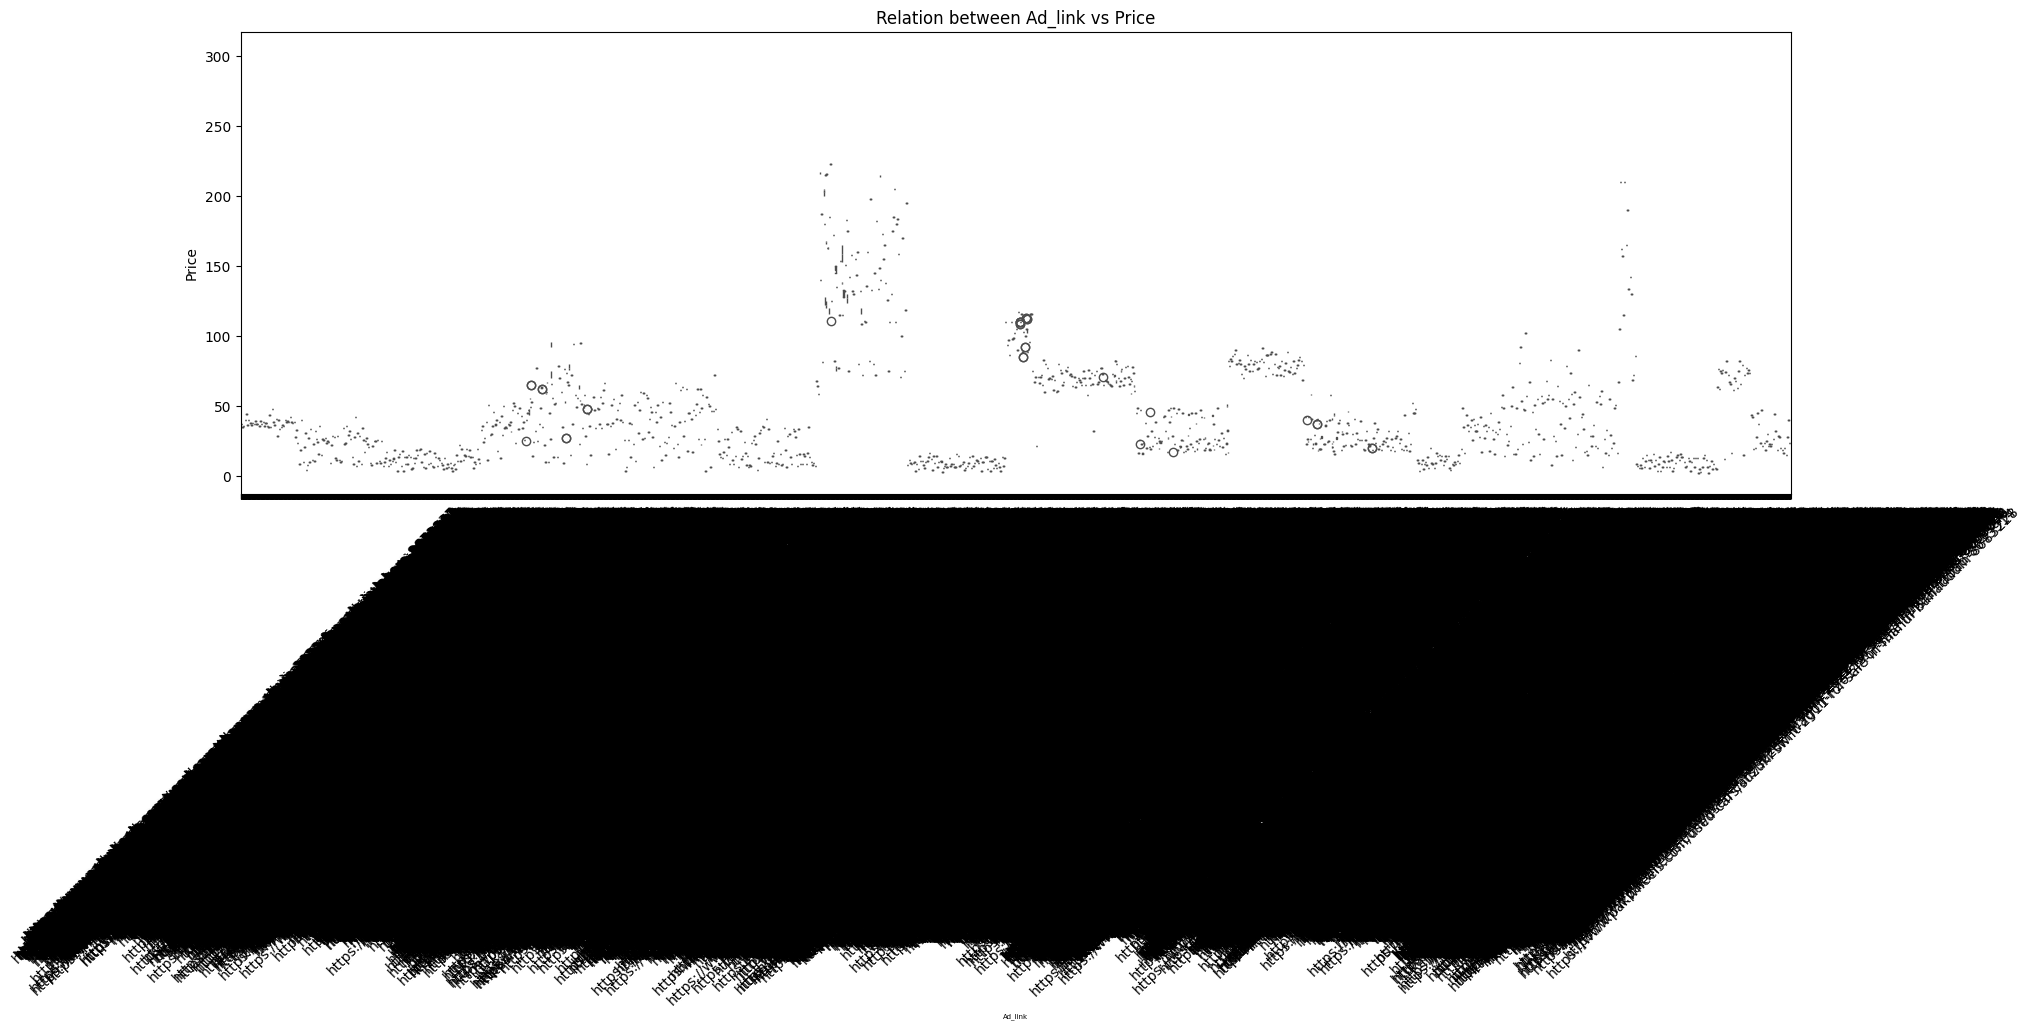

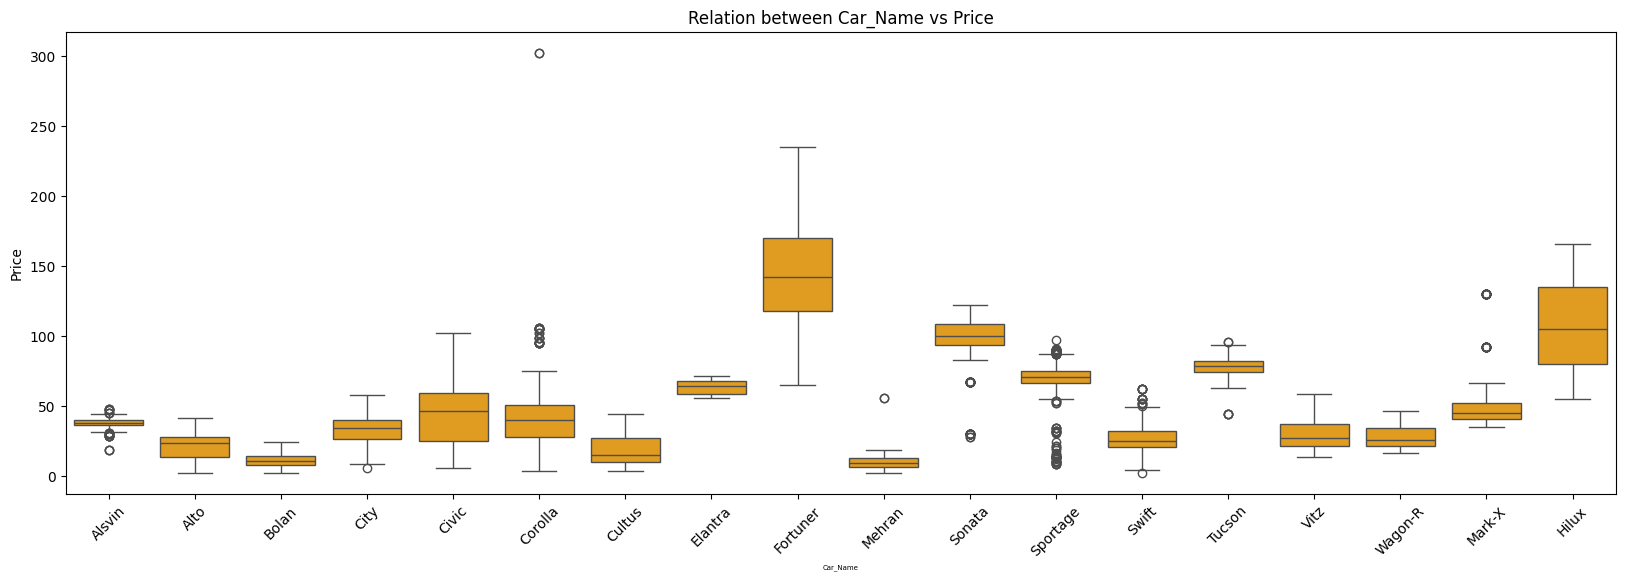

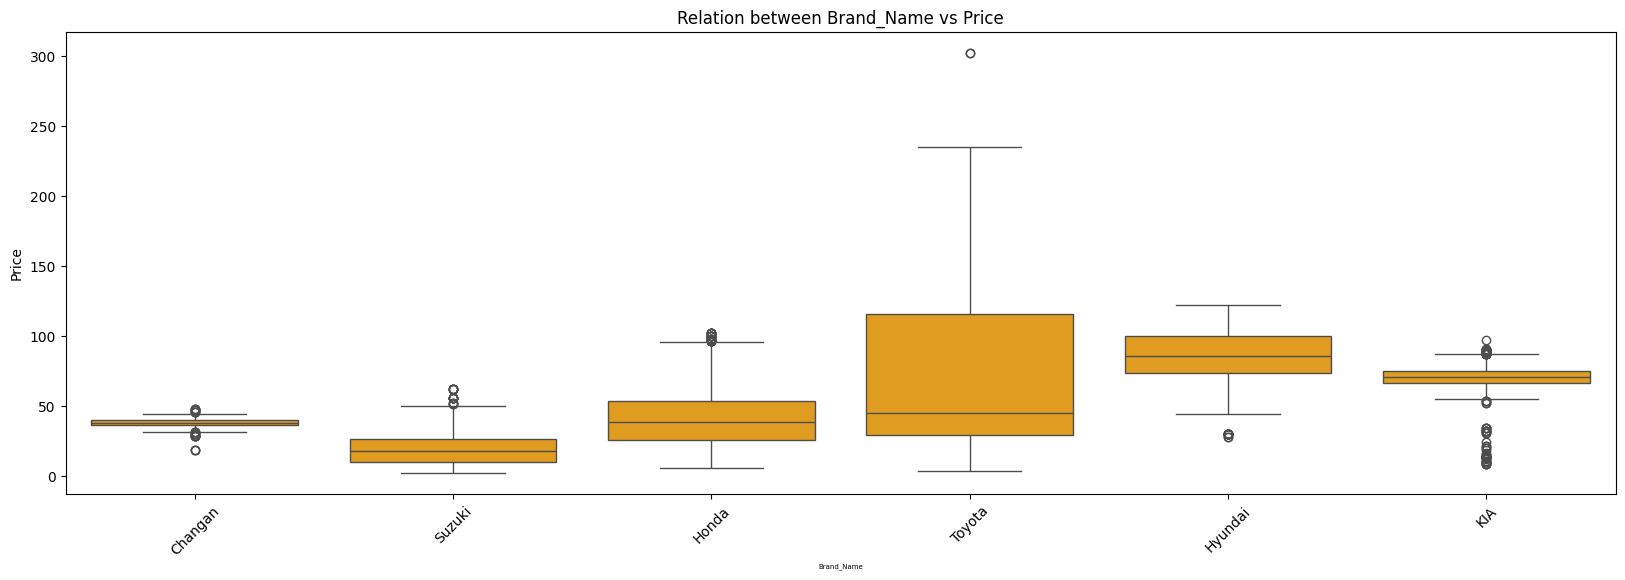

In [53]:
for col in categorical_columns:
    plt.figure(figsize=(20,6))
    sns.boxplot(x = col , y = "Price",data=copy_dataset,color='orange')
    plt.title(f'Relation between {col} vs Price')
    plt.xlabel(col,fontsize = 5)
    plt.ylabel('Price')
    plt.xticks(rotation = 45)
    plt.show()

Getting the relevent columns

In [56]:
dataset_for_training = pd.DataFrame(copy_dataset)

In [57]:
dataset_for_training

,AD_Name,AD_id,Engine Capacity,Category,Body Condition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Assembly,Price,Ad_link,ad_Date,Car_Name,Brand_Name
0,Changan Alsvin 1.5L DCT Lumiere 2022,8667314,1500,Sedan,Good,2022,57000,Petrol,Automatic,Steller White,Islamabad,Local,38.50,https://www.pakwheels.com/used-cars/changan-al...,2024-02-23,Alsvin,Changan
1,Changan Alsvin 1.5L DCT Lumiere 2022,8671937,1500,Sedan,Excellent,2022,23000,Petrol,Automatic,Steller White,Punjab,Local,36.95,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
2,Changan Alsvin 1.5L DCT Lumiere 2022,8671719,1500,Sedan,Good,2022,11900,Petrol,Automatic,Galaxy Black,Islamabad,Imported,36.90,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
3,Changan Alsvin 1.5L DCT Lumiere 2021,8670594,1500,Sedan,Fair,2021,40000,Petrol,Automatic,Silver,Islamabad,Local,37.50,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
4,Changan Alsvin 1.5L DCT Lumiere 2022,8605664,1500,Sedan,Good,2022,16000,Petrol,Automatic,Black,Karachi,Local,37.50,https://www.pakwheels.com/used-cars/changan-al...,2024-05-04,Alsvin,Changan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22256,Toyota Vitz F 1.0 2009,8726704,1000,Hatchback,Excellent,2009,125000,Petrol,Automatic,Metallic,Lahore,Imported,24.50,https://www.pakwheels.com/used-cars/toyota-vit...,2024-05-18,Vitz,Toyota
22257,Toyota Vitz U 1.3 2007,8726682,1300,Hatchback,Excellent,2007,125000,Petrol,Automatic,Beige,Sindh,Imported,17.95,https://www.pakwheels.com/used-cars/toyota-vit...,2024-05-18,Vitz,Toyota
22258,Toyota Vitz F 1.0 2007,8726670,1000,Hatchback,Good,2007,150000,Petrol,Automatic,White,Islamabad,Imported,20.50,https://www.pakwheels.com/used-cars/toyota-vit...,2024-05-18,Vitz,Toyota
22259,Toyota Vitz F Safety Edition III 2019,8598673,1000,Hatchback,Good,2019,64000,Petrol,Automatic,Black,Karachi,Imported,41.25,https://www.pakwheels.com/used-cars/toyota-vit...,2024-05-18,Vitz,Toyota


## Droppping un-wanted columns

In [58]:
dataset_for_training.drop(columns=['AD_Name','AD_id','Ad_link',	'ad_Date'],inplace=True)


In [59]:
dataset_for_training.head()

,Engine Capacity,Category,Body Condition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Assembly,Price,Car_Name,Brand_Name
0,1500,Sedan,Good,2022,57000,Petrol,Automatic,Steller White,Islamabad,Local,38.50,Alsvin,Changan
1,1500,Sedan,Excellent,2022,23000,Petrol,Automatic,Steller White,Punjab,Local,36.95,Alsvin,Changan
2,1500,Sedan,Good,2022,11900,Petrol,Automatic,Galaxy Black,Islamabad,Imported,36.90,Alsvin,Changan
3,1500,Sedan,Fair,2021,40000,Petrol,Automatic,Silver,Islamabad,Local,37.50,Alsvin,Changan
4,1500,Sedan,Good,2022,16000,Petrol,Automatic,Black,Karachi,Local,37.50,Alsvin,Changan


In [60]:
dataset_for_training = dataset_for_training[['Car_Name','Brand_Name','Engine Capacity','Category','Body Condition','model Year','Milage','Fuel Type','Transmission','Color','City Registered',
                                        'Price']]

In [61]:
dataset_for_training

,Car_Name,Brand_Name,Engine Capacity,Category,Body Condition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price
0,Alsvin,Changan,1500,Sedan,Good,2022,57000,Petrol,Automatic,Steller White,Islamabad,38.50
1,Alsvin,Changan,1500,Sedan,Excellent,2022,23000,Petrol,Automatic,Steller White,Punjab,36.95
2,Alsvin,Changan,1500,Sedan,Good,2022,11900,Petrol,Automatic,Galaxy Black,Islamabad,36.90
3,Alsvin,Changan,1500,Sedan,Fair,2021,40000,Petrol,Automatic,Silver,Islamabad,37.50
4,Alsvin,Changan,1500,Sedan,Good,2022,16000,Petrol,Automatic,Black,Karachi,37.50
...,...,...,...,...,...,...,...,...,...,...,...,...
22256,Vitz,Toyota,1000,Hatchback,Excellent,2009,125000,Petrol,Automatic,Metallic,Lahore,24.50
22257,Vitz,Toyota,1300,Hatchback,Excellent,2007,125000,Petrol,Automatic,Beige,Sindh,17.95
22258,Vitz,Toyota,1000,Hatchback,Good,2007,150000,Petrol,Automatic,White,Islamabad,20.50
22259,Vitz,Toyota,1000,Hatchback,Good,2019,64000,Petrol,Automatic,Black,Karachi,41.25


In [62]:
# Saving the Training Dataset as csv file so that we do not loose it
dataset_for_training.to_csv("Dataset_for_training.csv")

# Now its time for making Pipeline and Model 🚀

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import FeatureHasher 
from sklearn import set_config
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

import pandas as pd

### Reading the dataset

In [ ]:
dataset_for_training = pd.read_csv("Dataset_for_training.csv")

In [ ]:
dataset_for_training.columns

In [ ]:
dataset_for_training.head()

In [ ]:
# dropping the unwanted column
dataset_for_training.drop(columns=['Unnamed: 0'] , axis=1,inplace=True)

In [ ]:
dataset_for_training.head()

In [ ]:
dataset_for_training.columns

In [ ]:
dataset_for_training = dataset_for_training[['model Year','Milage','City Registered','Color','Engine Capacity','Brand_Name','Car_Name','Transmission','Fuel Type','Body Condition','Category','Price']]

In [ ]:
dataset_for_training.Brand_Name.value_counts().nlargest(30).plot(kind='bar')

### Convert all data to lowercase 
for better understanding

In [ ]:
lower_case_string = lambda x : x.lower() if isinstance(x,str) else x
dataset_for_training = dataset_for_training.map(lower_case_string)

In [ ]:
dataset_for_training.head()

### Spliting the Data


In [ ]:
dataset_for_training.dtypes

In [ ]:
print('Total Data is -->',dataset_for_training.shape[0])

In [ ]:
x_train,x_test , y_train,y_test = train_test_split(dataset_for_training.drop(columns=['Price'],axis= 1), dataset_for_training['Price'], test_size=0.3,random_state=12)

In [ ]:
print(f'Shape of Training Data -->\n Training Data --> {x_train.shape[0]}\n Training Label --> {y_train.shape[0]}')

In [ ]:
print(f'Shape of Testing Data -->\n Test Data --> {x_test.shape[0]}\n Test Label --> {y_test.shape[0]}')

In [ ]:
x_train

## Trying Linear Regression

In [ ]:
print(x_train.columns[5])
print(x_train.columns[6])
print(x_train.columns[7])
print(x_train.columns[8])
print(x_train.columns[9])
print(x_train.columns[10])


In [ ]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(),[8,9])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,10))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,10))])

# Model Linear Regression
m_lr = LinearRegression()


In [ ]:
# Defining the pipeline
pipe_lr = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])

In [ ]:
# fitting the pipeline with the training data
pipe_lr.fit(x_train,y_train)

In [ ]:
# predicting the model on the test data
y_predict_lr = pipe_lr.predict(x_test)
y_predict_lr

In [ ]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,y_predict_lr))
print("MSE = ",mean_squared_error(y_test,y_predict_lr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('r2 Score = ',r2_score(y_test,y_predict_lr))


In [ ]:
import pickle

# Save the pipeline using pickle
with open('Price_prediction_Linear.pkl', 'wb') as file:
    pickle.dump(pipe_lr, file)


In [ ]:
with open('Price_prediction_Linear.pkl', 'rb') as file:
    loaded_pipe_lr = pickle.load(file)

In [ ]:
pipe_lr.predict([[2015,12999,'punjab','white',1000,'suzuki','cultus','manual','petrol','poor','hatchback']])


## Decision Tree Regression

In [ ]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(),[8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = DecisionTreeRegressor()

# Defining the pipeline
pipe_dec = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])


# fitting the pipeline with the training data
pipe_dec.fit(x_train,y_train)

In [ ]:
# predicting the model on the test data
y_predict_lr = pipe_dec.predict(x_test)
y_predict_lr

In [ ]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,y_predict_lr))
print("MSE = ",mean_squared_error(y_test,y_predict_lr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('r2 Score = ',r2_score(y_test,y_predict_lr))


In [ ]:
x_test.tail()

In [ ]:
y_test.tail()

In [ ]:
print(y_predict_lr[-1])
print(y_predict_lr[-2])
print(y_predict_lr[-3])
print(y_predict_lr[-4])

print(y_predict_lr[-5])

In [ ]:
pipe_dec.predict([[2014,10000,'sindh','gray',800,'suzuki','mehran','manual','petrol','good','hatchback']])


## Trying XGboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[9])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = XGBRegressor()

# Defining the pipeline
pipe_lr_xg = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])


# fitting the pipeline with the training data
pipe_lr_xg.fit(x_train,y_train)

In [ ]:
# predicting the model on the test data
y_predict_lr = pipe_lr_xg.predict(x_test)
print('XGBoost Prediction',y_predict_lr)

In [ ]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,y_predict_lr))
print("MSE = ",mean_squared_error(y_test,y_predict_lr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('r2 Score = ',r2_score(y_test,y_predict_lr))


In [ ]:
pipe_lr_xg.predict([[2019,10000,'multan','gray',1800,'honda','civic','automatic','petrol','excellent','sedan']])

### Now Random Forest Regressor

In [ ]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = RandomForestRegressor()

# Defining the pipeline
pipe_lr_random = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])


# fitting the pipeline with the training data
pipe_lr_random.fit(x_train,y_train)

In [ ]:
y_predict_lr = pipe_lr_random.predict(x_test)
print('Random Forest Prediction',y_predict_lr)

In [ ]:
print("----------- Evaluation Matrices of Random Forest Model ---------")
print("MAE = ",mean_absolute_error(y_test,y_predict_lr))
print("MSE = ",mean_squared_error(y_test,y_predict_lr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('r2 Score = ',r2_score(y_test,y_predict_lr))


In [ ]:
import gradio as gr

model Year	Milage	City Registered	Color	Engine Capacity	Brand_Name	Car_Name	Transmission	Fuel Type	Body Consition	Category

In [ ]:
pipe_lr_random.predict([[2015,150000,'multan','gray',1800,'honda','civic','automatic','petrol','poor','sedan']])


In [ ]:
import gradio as gr

def ok(car_brand, car_name, model_year, mileage, city_registered, color, engine_c, trans, fuel_type, Body_C, Cate):
    print(car_brand, car_name, model_year, mileage, city_registered, color, engine_c, trans, fuel_type, Body_C, Cate)
    predict = pipe_lr.predict([[model_year,mileage,city_registered,color,engine_c,car_brand,car_name,trans,fuel_type,Body_C,Cate]])
    return f"{[predict[0]]} lacs"
years_list = list(range(2024, 1899, -1))

gr.Interface(fn=ok, 
              inputs=[gr.Dropdown(['suzuki','toyota','honda','kia'], label='Brand'),
                      gr.Textbox(lines=1, label="Car Name"),
                      gr.Dropdown(choices=years_list, label='Model Year'),
                      gr.Number(label="Mileage Km"),
                      gr.Textbox(lines=1, label="City Register"),
                      gr.Textbox(lines=1, label="Color"),
                      gr.Number(label="Engine Capacity in CC"),
                      gr.Radio(["automatic", "manual"], label="Transmission Type"),
                      gr.Radio(["hybrid", "petrol",'diesel'], label="Fuel Type"),
                      gr.Radio(['excellent','good','fair','poor'], label="Body Condition"),
                      gr.Radio(["hatchback", "sedan",'suv','croosover'], label="Category")],
              outputs=gr.Textbox(label="Result")).launch()
